# ITS307 Data Analytics : Assignment 1

**Gyalpozhing College of Information Technology </br>
Spring Semester 2022**</br>


## Part 1: Drake or Rihanna?

Billboard Magazine puts out a top 100 list of "singles" every week. Information from this list, as well as that from music sales, radio, and other sources is used to determine a top-100 "singles" of the year list. A single is typically one song, but sometimes can be two songs which are on one "single" record.

In this homework you will:

1. Read data from ``yearinfo.json`` which is scraped from Wikipedia to obtain information about the best singers and groups from each year (distinguishing between the two groups) as determined by the Billboard top 100 charts. You will have to clean this data.First you will learn how to read data from json files and create dataframe.

2. Use pandas and matplotlib to represents and explore data

### 1.1 Loading data from json file

Load our JSON file into the ``yearinfo`` variable, just to be sure everything is working.

In [202]:
#Write your code here, You may need to use python open() function to open the file and load data.
import pandas as pd
import json
import matplotlib.pyplot as plt

df =open ("yearinfo.json")



In [203]:
data= json.load(df)

In [204]:
# checking for number of years
data.keys()

dict_keys(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])

In [205]:
data['2013'][0].keys()

# getting column names using year 2013

dict_keys(['band_singer', 'song', 'songurl', 'ranking', 'titletext', 'url'])

In [206]:
# # creating column year
# col = list(data['2010'][0].keys())+(['year'])
# col

In [207]:
# Store the values in the a new list along with the year
# data_list = []
# for key, value in data.items():
#     for i in value:
#         data = list(i.values())+[key]
#         data_lst.append(data)
# print(data_lst)

In [208]:
# Construct a DataFrame
# df = pd.DataFrame(data_lst,columns=col)

### 1.2 Constructing dataframe from `yearinfo`

Construct a year-song-singer dataframe from the yearly information

Let's construct a dataframe **`df`** from the `yearinfo`. The frame should be similar to the frame below. Each row of the frame represents a song, and carries with it the chief properties of year, song, singer, and ranking.

![image-3.png](attachment:image-3.png)

To construct the dataframe, we'll need to iterate over the years and the singles per year. Notice how, above, the dataframe is ordered by ranking and then year. While the exact order is up to you, note that you will have to come up with a scheme to order the information.

Check that the dataframe has sensible data types. You will also likely find that the year field has become an "object" (Pandas treats strings as generic objects): this is due to the conversion to and back from JSON. Such conversions need special care. Fix any data type issues with `df`. (See Pandas astype function.) We will use this `df` in the next question.

In [209]:
#write your code here
col = list(data['2010'][0].keys())+(['year'])
col



['band_singer', 'song', 'songurl', 'ranking', 'titletext', 'url', 'year']

In [210]:
# Store the values in the a new list along with the year
song_list = []
for key, value in data.items():
    for i in value:
        dat = list(i.values())+[key]
        song_list.append(dat)
print(song_list)

[[['Kesha'], ['/wiki/Tik_Tok_(song)'], ['Tik Tok (song)'], 1, '"Tik Tok"', ['/wiki/Kesha'], '2010'], [['Lady Antebellum'], ['/wiki/Need_You_Now_(Lady_Antebellum_song)'], ['Need You Now (Lady Antebellum song)'], 2, '"Need You Now"', ['/wiki/Lady_Antebellum'], '2010'], [['Train (band)'], ['/wiki/Hey,_Soul_Sister'], ['Hey, Soul Sister'], 3, '"Hey, Soul Sister"', ['/wiki/Train_(band)'], '2010'], [['Katy Perry', 'Snoop Dogg'], ['/wiki/California_Gurls'], ['California Gurls'], 4, '"California Gurls"', ['/wiki/Katy_Perry', '/wiki/Snoop_Dogg'], '2010'], [['Usher (musician)', 'Will.i.am'], ['/wiki/OMG_(Usher_song)'], ['OMG (Usher song)'], 5, '"OMG"', ['/wiki/Usher_(musician)', '/wiki/Will.i.am'], '2010'], [['B.o.B', 'Hayley Williams'], ['/wiki/Airplanes_(song)'], ['Airplanes (song)'], 6, '"Airplanes"', ['/wiki/B.o.B', '/wiki/Hayley_Williams'], '2010'], [['Eminem', 'Rihanna'], ['/wiki/Love_the_Way_You_Lie'], ['Love the Way You Lie'], 7, '"Love the Way You Lie"', ['/wiki/Eminem', '/wiki/Rihanna']

In [211]:
df = pd.DataFrame(song_list,columns=col)

In [212]:
df.head(5)

band_singer                                         song  \
0                        [Kesha]                       [/wiki/Tik_Tok_(song)]   
1              [Lady Antebellum]  [/wiki/Need_You_Now_(Lady_Antebellum_song)]   
2                 [Train (band)]                     [/wiki/Hey,_Soul_Sister]   
3       [Katy Perry, Snoop Dogg]                     [/wiki/California_Gurls]   
4  [Usher (musician), Will.i.am]                     [/wiki/OMG_(Usher_song)]   

                                 songurl  ranking           titletext  \
0                       [Tik Tok (song)]        1           "Tik Tok"   
1  [Need You Now (Lady Antebellum song)]        2      "Need You Now"   
2                     [Hey, Soul Sister]        3  "Hey, Soul Sister"   
3                     [California Gurls]        4  "California Gurls"   
4                     [OMG (Usher song)]        5               "OMG"   

                                         url  year  
0                              [/wiki/Kesha]  2010  
1                    [/wiki/Lady_Antebellum]  2010  
2                       [/wiki/Train_(band)]  2010  
3       [/wiki/Katy_Perry, /wiki/Snoop_Dogg]  2010  
4  [/wiki/Usher_(musician), /wiki/Will.i.am]  2010

In [213]:
df.dtypes
# check data types. year is object, chane it to numerical

band_singer    object
song           object
songurl        object
ranking         int64
titletext      object
url            object
year           object
dtype: object

In [214]:
df = df.astype({'year': 'int64'})


In [215]:
df.dtypes

band_singer    object
song           object
songurl        object
ranking         int64
titletext      object
url            object
year            int64
dtype: object

In [216]:
# function to return the value from a list 
def list_value(list_name):
    val = list_name[0]
    return val

# Store the value in a format we want
df['band_singer'] = df.band_singer.map(list_value)
df['song'] = df.song.map(list_value)
df['songurl'] = df.songurl.map(list_value)
df['url'] = df.url.map(list_value)



df.head(5)

band_singer                                       song  \
0             Kesha                       /wiki/Tik_Tok_(song)   
1   Lady Antebellum  /wiki/Need_You_Now_(Lady_Antebellum_song)   
2      Train (band)                     /wiki/Hey,_Soul_Sister   
3        Katy Perry                     /wiki/California_Gurls   
4  Usher (musician)                     /wiki/OMG_(Usher_song)   

                               songurl  ranking           titletext  \
0                       Tik Tok (song)        1           "Tik Tok"   
1  Need You Now (Lady Antebellum song)        2      "Need You Now"   
2                     Hey, Soul Sister        3  "Hey, Soul Sister"   
3                     California Gurls        4  "California Gurls"   
4                     OMG (Usher song)        5               "OMG"   

                      url  year  
0             /wiki/Kesha  2010  
1   /wiki/Lady_Antebellum  2010  
2      /wiki/Train_(band)  2010  
3        /wiki/Katy_Perry  2010  
4  /wiki/Usher_(musician)  2010

In [217]:
# lets remove /wiki/ from song and url
df['song']=df['song'].str.strip('/wiki/')
df['url']=df['url'].str.strip('/wiki/')

df.head(5)

band_singer                                 song  \
0             Kesha                       Tik_Tok_(song)   
1   Lady Antebellum  Need_You_Now_(Lady_Antebellum_song)   
2      Train (band)                     Hey,_Soul_Sister   
3        Katy Perry                     California_Gurls   
4  Usher (musician)                     OMG_(Usher_song)   

                               songurl  ranking           titletext  \
0                       Tik Tok (song)        1           "Tik Tok"   
1  Need You Now (Lady Antebellum song)        2      "Need You Now"   
2                     Hey, Soul Sister        3  "Hey, Soul Sister"   
3                     California Gurls        4  "California Gurls"   
4                     OMG (Usher song)        5               "OMG"   

                url  year  
0             Kesha  2010  
1   Lady_Antebellum  2010  
2      Train_(band)  2010  
3        Katy_Perry  2010  
4  Usher_(musician)  2010

### 1.3 Who are the highest quality singers?

Here we show the highest quality singers and plot them on a bar chart.

#### Find highest quality singers according to how prolific they are

What do we mean by highest quality? This is of course open to interpretation, but let's define "highest quality" here as the number of times a singer appears in the top 100 over this time period. If a singer appears twice in a year (for different songs), this is counted as two appearances, not one. 

Make a bar-plot of the most prolific singers. Singers on this chart should have appeared at-least more than 15 times. (HINT: look at the docs for the pandas method `value_counts`.)

In [218]:
#Write your program and plot bar graph
# Top 10
df.value_counts(subset=['band_singer'])[:10]


band_singer     
Drake (musician)    26
Maroon 5            21
Rihanna             21
Ariana Grande       20
Taylor Swift        19
The Weeknd          16
Katy Perry          14
Chris Brown         14
Justin Bieber       14
Post Malone         13
dtype: int64

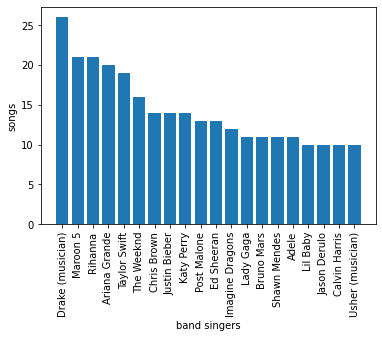

In [219]:
# lets graph the data to get clear picture
y = df.band_singer.value_counts()[:20]
x = y.index
plt.bar(x,y)
plt.xticks(rotation=90)
plt.xlabel('band singers')
plt.ylabel('songs')
plt.show()

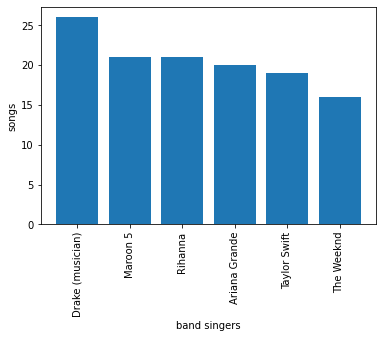

In [220]:
# lets plot graph for singers who appeared more than 15 times

y = df.band_singer.value_counts().loc[lambda x : x > 15]
x = y.index
plt.bar(x,y)
plt.xticks(rotation=90)
plt.xlabel('band singers')
plt.ylabel('songs')
plt.show()

**Question: Who is the most profilic singer?**


**Answer**=> The most profilic singer is drake, as shown in graps above we can easily see that drake appeared more than 15 time along with 5 other singers, but he ranked first as he appeared more than 25 times.

### 1.4 What if we used a different metric?

What we would like to capture is this: a singer should to be scored higher if the singer appears higher in the rankings. So we'd say that a singer who appeared once at a higher and once at a lower ranking is a "higher quality" singer than one who appeared twice at a lower ranking.

To do this, group all of a singers songs together and assign each song a score 101 - ranking. Order the singers by their total score and make a bar chart for the top 20.

In [221]:
#write your code here

df['score'] = [101-i for i in df['ranking']]
df.head()

band_singer                                 song  \
0             Kesha                       Tik_Tok_(song)   
1   Lady Antebellum  Need_You_Now_(Lady_Antebellum_song)   
2      Train (band)                     Hey,_Soul_Sister   
3        Katy Perry                     California_Gurls   
4  Usher (musician)                     OMG_(Usher_song)   

                               songurl  ranking           titletext  \
0                       Tik Tok (song)        1           "Tik Tok"   
1  Need You Now (Lady Antebellum song)        2      "Need You Now"   
2                     Hey, Soul Sister        3  "Hey, Soul Sister"   
3                     California Gurls        4  "California Gurls"   
4                     OMG (Usher song)        5               "OMG"   

                url  year  score  
0             Kesha  2010    100  
1   Lady_Antebellum  2010     99  
2      Train_(band)  2010     98  
3        Katy_Perry  2010     97  
4  Usher_(musician)  2010     96

In [222]:
# add total score
score = {}

for singer, songs in df.groupby('band_singer'):
    score[singer] = songs.score.sum()

score

{'2 Chainz': 49,
 '21 Savage': 112,
 '24kGoldn': 151,
 '3OH!3': 28,
 '5 Seconds of Summer': 156,
 '6ix9ine': 115,
 'A Boogie wit da Hoodie': 99,
 'A Great Big World': 84,
 'AJR (band)': 45,
 'ASAP Ferg': 27,
 'ASAP Rocky': 60,
 'Ace Hood': 10,
 'Adam Lambert': 56,
 'Adele': 657,
 'Alessia Cara': 140,
 'Alex Clare': 71,
 'Alicia Keys': 77,
 'Aloe Blacc': 53,
 'American Authors': 70,
 'Aminé (rapper)': 41,
 'Andy Grammer': 76,
 'Anna Kendrick': 80,
 'Ariana Grande': 1104,
 'Arizona Zervas': 85,
 'Ava Max': 106,
 'Avicii': 202,
 'Avril Lavigne': 39,
 'Awolnation': 76,
 'Ayo & Teo': 40,
 'B.o.B': 244,
 'BRS Kash': 4,
 'BTS': 213,
 'Baauer': 97,
 'Bad Bunny': 148,
 'Bad Meets Evil': 67,
 'Bastille (band)': 89,
 'Bazzi (singer)': 86,
 'Bebe Rexha': 98,
 'Becky G': 32,
 'Benee': 17,
 'Benny Blanco': 108,
 'Beyoncé': 172,
 'Big Sean': 178,
 'Billie Eilish': 380,
 'Black Eyed Peas': 51,
 'Blackbear (musician)': 78,
 'Blake Shelton': 200,
 'Blanco Brown': 45,
 'BlocBoy JB': 78,
 'Blueface': 54,


In [223]:
# score_df = df.value_counts(subset=['band_singer'], ascending=False)
# score_df

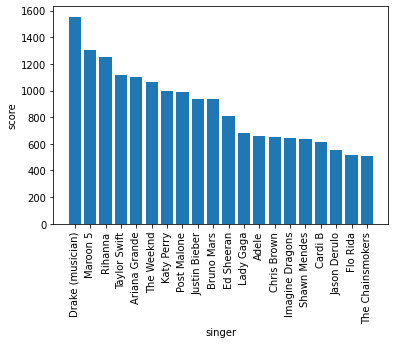

In [224]:
# Get singer with highest score
y = pd.Series(data=score, index=score.keys()).sort_values(ascending=False)[:20]
x = y.index
plt.bar(x,y)
plt.xticks(rotation=90)
plt.xlabel('singer')
plt.ylabel('score')
plt.show()

**Question:Do you notice any major differences when you change the metric? How have the singers at the top shifted places? Why do you think this happens?**

**Answer =>** There is difference when i changed the matrix. while comparing the graphs we see that Taylor swift ranked 4th place but it was Ariana Grande who ranked 4th in first graph. This is because, in first graph we ranked the singers according to number of times they appeared while in second graph, we gave each singer a score( singers who ranked higher recieved more score) regardless of hoe mang times they appeared. Therefore the second matric is more relatable in real life as each singer recieved score according to rank and not number of times they appeared because appearing more does not defined that singer is profilic singer when the ranking is low.

## Part 2: Using group properties

Frame any questions that you want to answer using group properties and interpret your result using appropriate visualizations.
 

which singers are least profilic singers?

In [225]:
less_df = df.value_counts(subset=['score'], ascending=True)
less_df

score
1        12
73       12
72       12
71       12
70       12
         ..
29       12
28       12
27       12
37       12
100      12
Length: 100, dtype: int64

In [226]:
sc = {}

for singer, songs in df.groupby('band_singer'):
    sc[singer] = songs.score.sum()

sc

{'2 Chainz': 49,
 '21 Savage': 112,
 '24kGoldn': 151,
 '3OH!3': 28,
 '5 Seconds of Summer': 156,
 '6ix9ine': 115,
 'A Boogie wit da Hoodie': 99,
 'A Great Big World': 84,
 'AJR (band)': 45,
 'ASAP Ferg': 27,
 'ASAP Rocky': 60,
 'Ace Hood': 10,
 'Adam Lambert': 56,
 'Adele': 657,
 'Alessia Cara': 140,
 'Alex Clare': 71,
 'Alicia Keys': 77,
 'Aloe Blacc': 53,
 'American Authors': 70,
 'Aminé (rapper)': 41,
 'Andy Grammer': 76,
 'Anna Kendrick': 80,
 'Ariana Grande': 1104,
 'Arizona Zervas': 85,
 'Ava Max': 106,
 'Avicii': 202,
 'Avril Lavigne': 39,
 'Awolnation': 76,
 'Ayo & Teo': 40,
 'B.o.B': 244,
 'BRS Kash': 4,
 'BTS': 213,
 'Baauer': 97,
 'Bad Bunny': 148,
 'Bad Meets Evil': 67,
 'Bastille (band)': 89,
 'Bazzi (singer)': 86,
 'Bebe Rexha': 98,
 'Becky G': 32,
 'Benee': 17,
 'Benny Blanco': 108,
 'Beyoncé': 172,
 'Big Sean': 178,
 'Billie Eilish': 380,
 'Black Eyed Peas': 51,
 'Blackbear (musician)': 78,
 'Blake Shelton': 200,
 'Blanco Brown': 45,
 'BlocBoy JB': 78,
 'Blueface': 54,


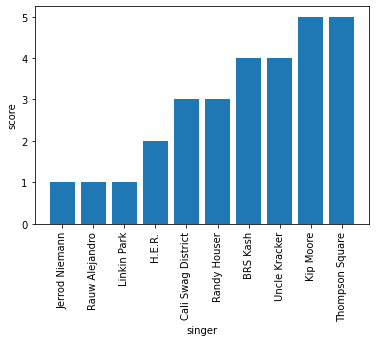

In [227]:
y = pd.Series(data=sc, index=sc.keys()).sort_values(ascending=True)[:10]
x = y.index
plt.bar(x,y)
plt.xticks(rotation=90)
plt.xlabel('singer')
plt.ylabel('score')
plt.show()

Question was : which singers are least profilic singers?

**ANS** least profilic singer is Jerrod Niemann, followed by Rauw Alejandro, Linkin Park, H.E.R, cali Swag District and so on as shown in above graph.

## SUBMISSION DATE: 2nd April 2022 